In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [3]:
l_df = pd.read_csv('Coursera.csv')
df = l_df.sample(frac=0.1, random_state=42)
df

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
3186,Fundamentals of particle accelerator technolog...,Lund University,Intermediate,4.6,https://www.coursera.org/learn/fundamentals-pa...,Did you know that particle accelerators play a...,physics beam robotics energy Electrical Eng...
1886,Introduction to Social Media Analytics,Emory University,Advanced,4.4,https://www.coursera.org/learn/social-media-an...,Social media not only provides marketers with ...,analysis Market Analysis utility Data Minin...
2966,Global sustainability and corporate social res...,Macquarie University,Advanced,4.8,https://www.coursera.org/learn/global-sustaina...,It is no longer acceptable for organisations t...,global proactivity corporate social responsi...
3429,"Advanced Valuation and Strategy - M&A, Private...",Erasmus University Rotterdam,Advanced,4.6,https://www.coursera.org/learn/Advanced-valuat...,Hi and welcome to this course! Would you lik...,Game Theory valuation of options options str...
139,Wireshark for Basic Network Security Analysis,Coursera Project Network,Beginner,4.4,https://www.coursera.org/learn/wireshark-for-n...,In this 1-hour 30-minutes long project-based c...,https telnet key (cryptography) plaintext ...
...,...,...,...,...,...,...,...
3090,Giving Sense to Your Leadership Experience,HEC Paris,Intermediate,4.5,https://www.coursera.org/learn/leading-sense,With this course you will position your own le...,self-awareness Resilience Leadership and Man...
2465,Introduction to Front-end Development with Rea...,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/into-to-reactjs,"In this 1-hour long project-based course, you ...",javascript framework Javascript project htm...
1459,Fashion E-Commerce in XD,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/fashion-e-comme...,"By the end of this project, you will understan...",mathematical optimization project mine engli...
2189,Statistics with SAS,SAS,Advanced,4.8,https://www.coursera.org/learn/sas-statistics,This introductory course is for SAS software u...,two-way analysis of variance General Statisti...


In [4]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [5]:
tokenizer = Tokenizer(num_words=5000, split=' ')
tokenizer.fit_on_texts(df['Course Description'].values)

X = tokenizer.texts_to_sequences(df['Course Description'].values)
X = pad_sequences(X)

Y = pd.get_dummies(df['Skills']).values

In [6]:
split = int(0.8 * len(X))

X_train = X[:split]
X_test = X[split:]

Y_train = Y[:split]
Y_test = Y[split:]

In [7]:
model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(Y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
model.fit(X_train, Y_train, epochs=1, batch_size=64)

2/5 [===========>..................] - ETA: 31:36 - loss: 5.8528 - accuracy: 0.0000e+00

In [ ]:
new_description = "Designing a Professional Portrait"

# Convert the new description to a padded sequence
new_description_seq = tokenizer.texts_to_sequences([new_description])
new_description_seq = pad_sequences(new_description_seq, maxlen=X.shape[1])

# Make predictions for the new course description
pred_probs = model.predict(new_description_seq)[0]

# Find the indices of the top 20 predicted courses
top_ten_indices = np.argsort(pred_probs)[::-1][:20]

# Display the names of the top 20 predicted courses
top_ten_courses = df.iloc[top_ten_indices]['Course Name'].values
# print(top_ten_courses)

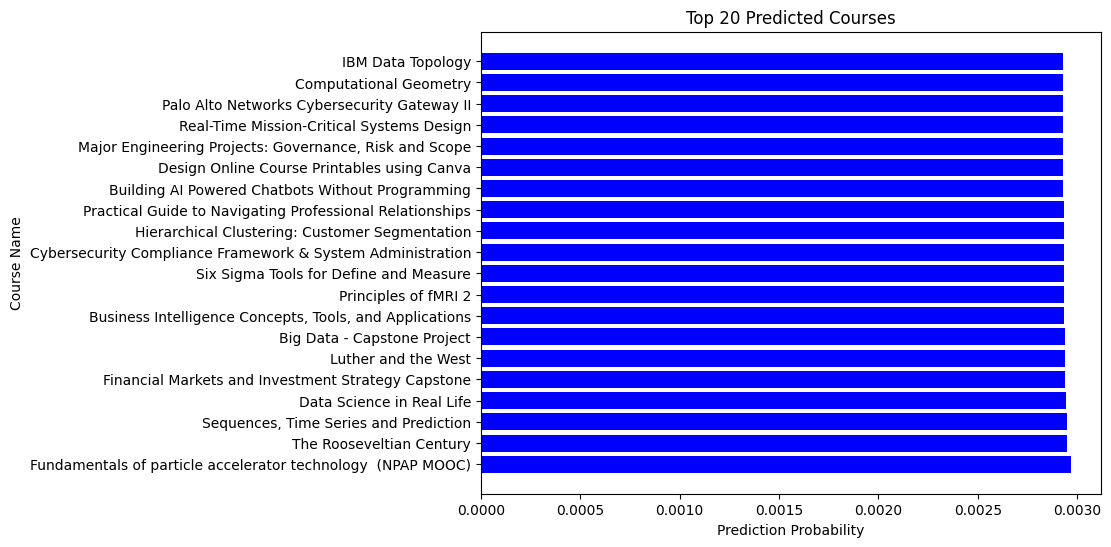

In [35]:
import matplotlib.pyplot as plt

# Create a list of the names of the top 20 predicted courses
top_ten_courses = df.iloc[top_ten_indices]['Course Name'].values.tolist()

# Create a list of the prediction probabilities for the top 20 courses
top_ten_probs = pred_probs[top_ten_indices].tolist()

# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(top_ten_courses, top_ten_probs, color='blue')

# Set the title and axis labels
ax.set_title('Top 20 Predicted Courses')
ax.set_xlabel('Prediction Probability')
ax.set_ylabel('Course Name')

# Display the plot
plt.show()


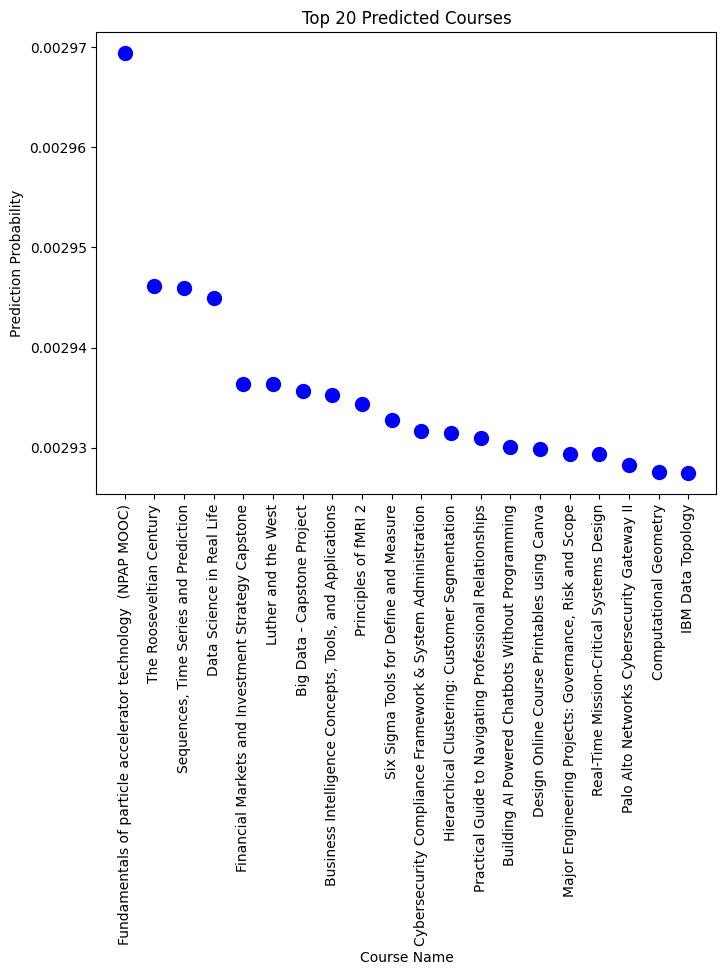

In [36]:
import matplotlib.pyplot as plt

# Create a list of the names of the top 20 predicted courses
top_ten_courses = df.iloc[top_ten_indices]['Course Name'].values.tolist()

# Create a list of the prediction probabilities for the top 20 courses
top_ten_probs = pred_probs[top_ten_indices].tolist()

# Create a scatter plot
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(top_ten_courses, top_ten_probs, s=100, color='blue')

# Set the title and axis labels
ax.set_title('Top 20 Predicted Courses')
ax.set_xlabel('Course Name')
ax.set_ylabel('Prediction Probability')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


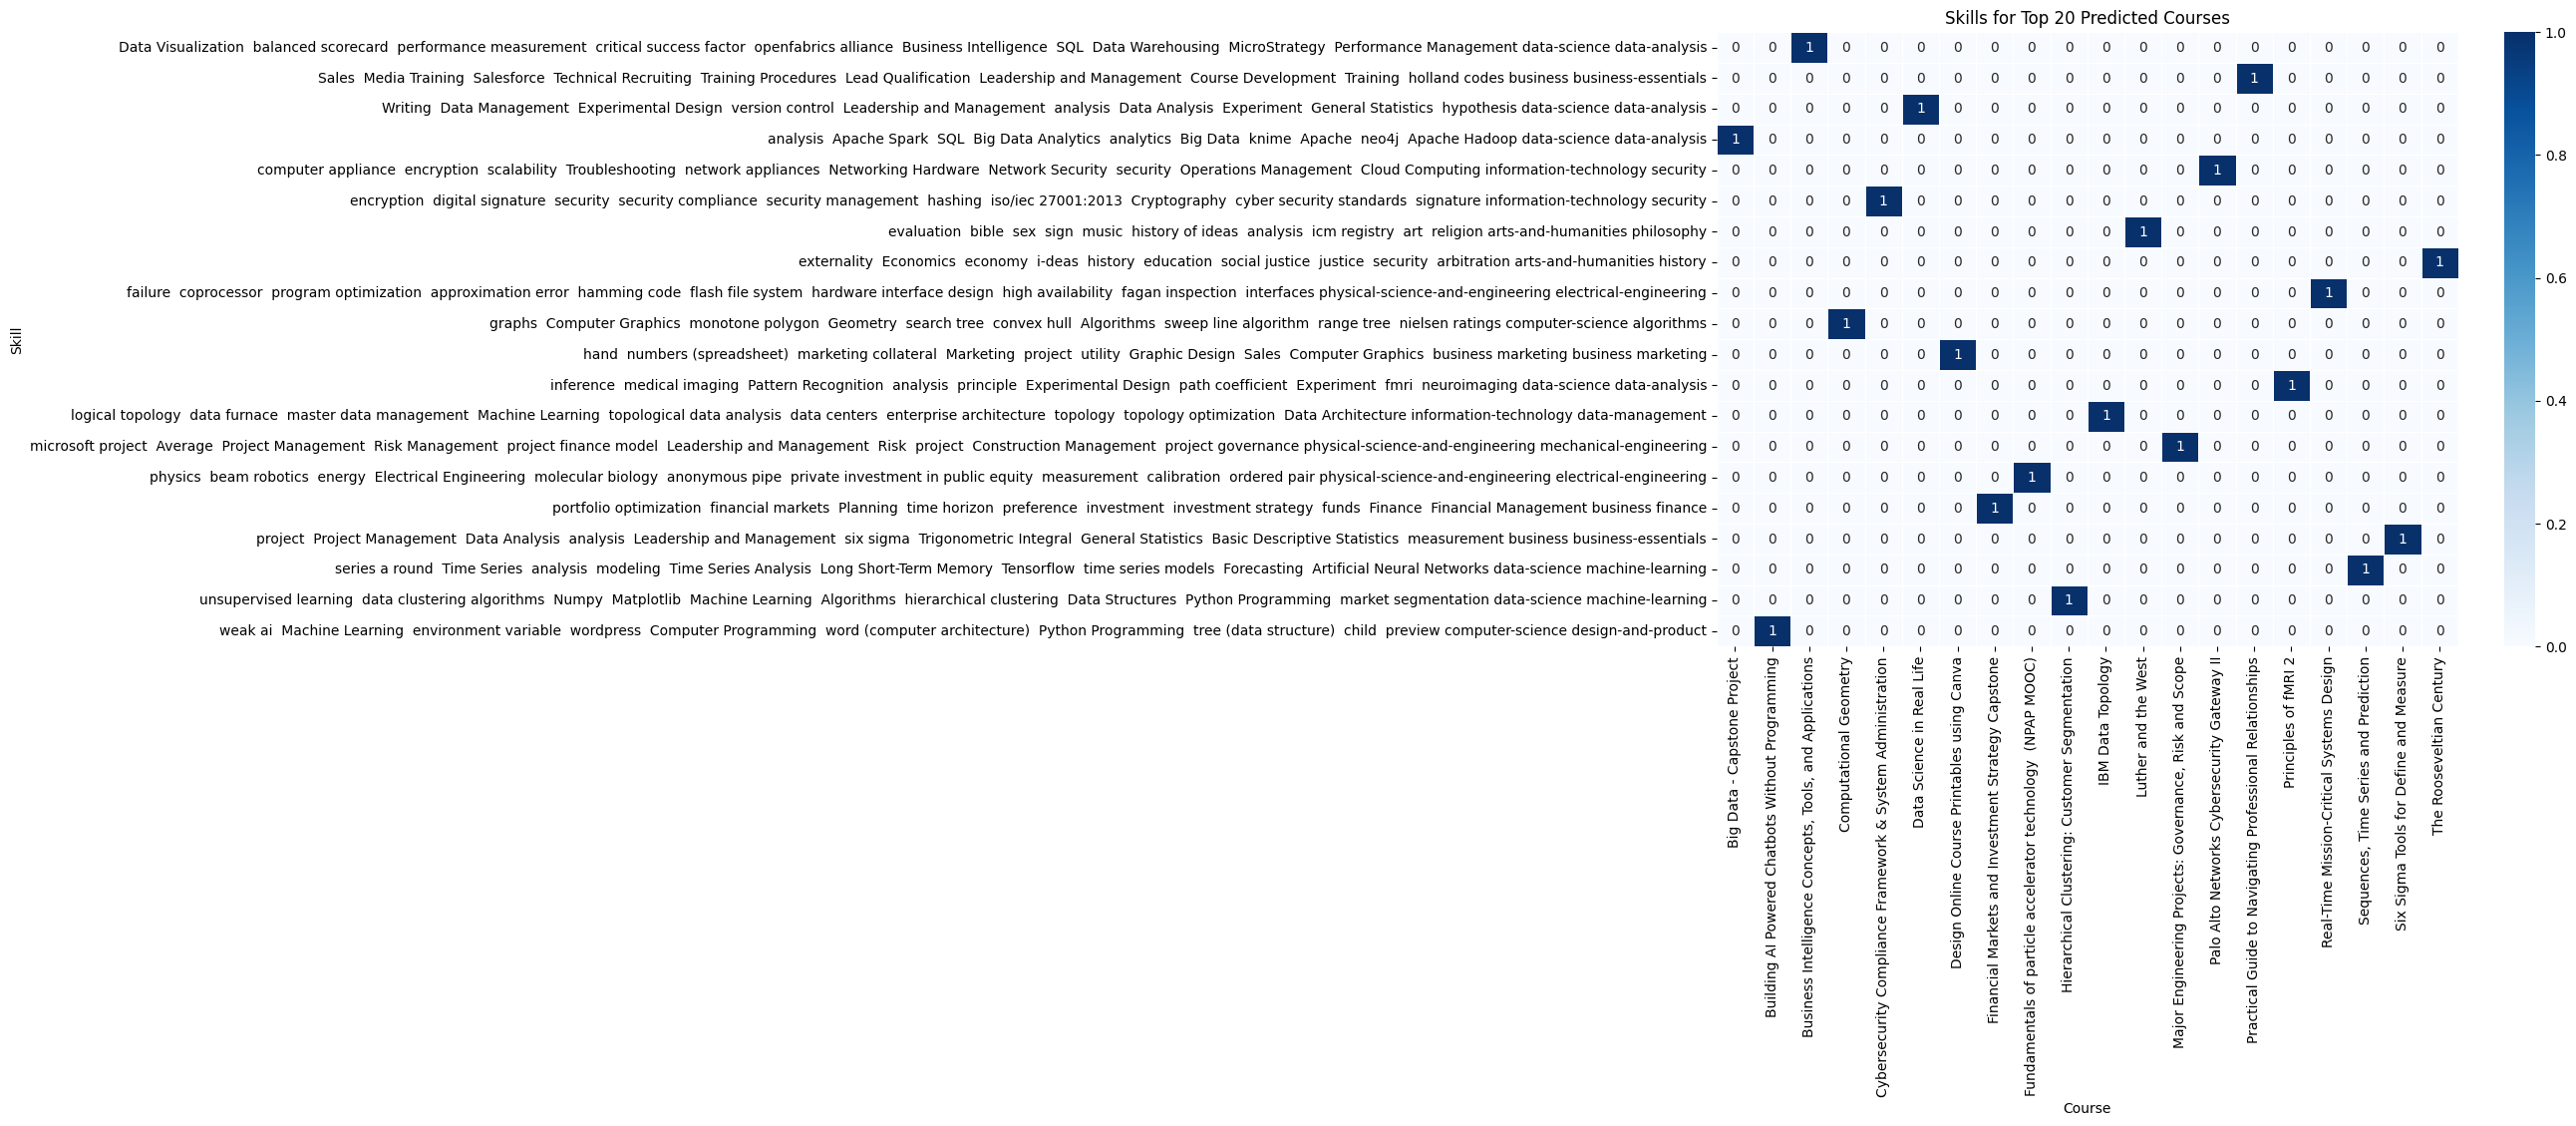

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the data for the top 20 predicted courses
top_courses = df.iloc[top_ten_indices]

# Split the skills column into separate columns
skills_df = top_courses['Skills'].str.get_dummies(sep=',')

# Add a column for the course name
skills_df['Course Name'] = top_courses['Course Name'].values

# Pivot the data to create a courses vs skills matrix
courses_vs_skills = skills_df.groupby('Course Name').sum().T

# Create the heatmap using seaborn
plt.figure(figsize=(12,8))
sns.heatmap(courses_vs_skills, cmap='Blues', annot=True, fmt='g', linewidths=0.5)

# Set the title and axis labels
plt.title('Skills for Top 20 Predicted Courses')
plt.xlabel('Course')
plt.ylabel('Skill')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()
